WEATHER

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../VacationPy/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [58]:
len(cities)

609

In [99]:
# Save config information
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'


In [100]:
city_weather_data = []
city_counter = 0
print('--------------------------------')
print('Beginning Data Retrieval')
print('--------------------------------')
for city in cities:
    individual_city = {}

    # Build query URL
    query_url = url + 'appid=' + weather_api_key + '&q=' + city +'&units=' + units

    # Get the data from the response
    try:
        # Get weather data for city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        # Parse response
        lat = weather_json['coord']['lat']
        lon = weather_json['coord']['lon']
        temp = weather_json['main']['temp_max']
        hum = weather_json['main']['humidity']
        cloud = weather_json['clouds']['all']
        wind = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        time_of_data_calc = weather_json['dt']
        
        # Adding city to results
        city_counter += 1
        print(f'Processing record {city_counter} | {city}')
        individual_city['City'] = city
        individual_city['Latitude'] = lat
        individual_city['Longitude'] = lon
        individual_city['Temperature'] = temp
        individual_city['Humidity'] = hum
        individual_city['Cloudiness'] = cloud
        individual_city['Wind Speed'] = wind
        individual_city['City country'] = country
        individual_city['City datetime'] = time_of_data_calc
        city_weather_data.append(individual_city)
    except:
        print(f'Issue occurred for city {city}. Skipping...')
print('--------------------------------')
print('Data Retrieval Complete')
print('--------------------------------')

--------------------------------
Beginning Data Retrieval
--------------------------------
Processing record 1 | severo-kurilsk
Issue occurred for city nizhneyansk. Skipping...
Processing record 2 | warrington
Processing record 3 | lata
Processing record 4 | sao gabriel da cachoeira
Processing record 5 | srandakan
Processing record 6 | kampene
Processing record 7 | havre-saint-pierre
Processing record 8 | atuona
Processing record 9 | punta arenas
Issue occurred for city taolanaro. Skipping...
Processing record 10 | bethel
Processing record 11 | kouango
Processing record 12 | deputatskiy
Processing record 13 | kimbe
Processing record 14 | kaitangata
Processing record 15 | ushuaia
Issue occurred for city hunza. Skipping...
Processing record 16 | miles city
Processing record 17 | saint-francois
Processing record 18 | katsuura
Processing record 19 | butaritari
Processing record 20 | karratha
Processing record 21 | klaksvik
Processing record 22 | port alfred
Processing record 23 | bluff
Pro

Processing record 221 | tasiilaq
Processing record 222 | korla
Processing record 223 | hobyo
Processing record 224 | pokhara
Processing record 225 | norden
Issue occurred for city mergui. Skipping...
Processing record 226 | nouadhibou
Processing record 227 | havelock
Processing record 228 | yarensk
Processing record 229 | sinnamary
Processing record 230 | coquimbo
Processing record 231 | ojinaga
Processing record 232 | morogoro
Processing record 233 | leh
Processing record 234 | xuddur
Processing record 235 | heihe
Processing record 236 | serebryanyy bor
Processing record 237 | talnakh
Processing record 238 | nacogdoches
Processing record 239 | carmo do rio claro
Processing record 240 | labytnangi
Processing record 241 | taber
Processing record 242 | rio grande
Processing record 243 | kalaleh
Processing record 244 | hamilton
Processing record 245 | porangatu
Processing record 246 | asau
Processing record 247 | baymak
Processing record 248 | kavieng
Processing record 249 | tual
Issue oc

Processing record 443 | kamenka
Processing record 444 | komsomolets
Processing record 445 | sisophon
Processing record 446 | buraydah
Processing record 447 | vacaria
Processing record 448 | aguadilla
Processing record 449 | sahuaripa
Processing record 450 | dalen
Issue occurred for city lolua. Skipping...
Processing record 451 | kiruna
Processing record 452 | plouzane
Processing record 453 | lakselv
Processing record 454 | andenes
Processing record 455 | doha
Processing record 456 | les cayes
Processing record 457 | basse
Processing record 458 | chaplynka
Issue occurred for city chagda. Skipping...
Processing record 459 | kudahuvadhoo
Processing record 460 | jalu
Processing record 461 | aitape
Processing record 462 | kilindoni
Processing record 463 | yilan
Processing record 464 | manoel urbano
Processing record 465 | albury
Processing record 466 | gwembe
Processing record 467 | forestville
Issue occurred for city satitoa. Skipping...
Processing record 468 | sturgeon bay
Processing reco

In [101]:
len(city_weather_data)

565

In [102]:
city_weather_df = pd.DataFrame(city_weather_data)
city_weather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City country,City datetime
0,severo-kurilsk,50.68,156.12,52.21,87,95,14.83,RU,1595970734
1,warrington,53.39,-2.58,60.80,72,20,11.41,GB,1595970469
2,lata,40.16,-8.33,64.99,94,0,2.30,PT,1595970734
3,sao gabriel da cachoeira,-0.13,-67.09,81.59,92,100,1.14,BR,1595970734
4,srandakan,-7.94,110.25,73.87,83,69,6.69,ID,1595970734
...,...,...,...,...,...,...,...,...,...
560,kirillov,59.86,38.38,68.00,82,40,4.47,RU,1595970815
561,mitu,1.20,-70.17,78.55,94,100,1.95,CO,1595970815
562,ukiah,39.15,-123.21,97.00,21,1,5.82,US,1595970815
563,howard springs,-12.50,131.05,64.99,27,27,6.93,AU,1595970815


In [103]:
city_weather_df.to_csv('output_data/cities.csv')
city_weather_df.to_csv(output_data_file) # for use by other notebook


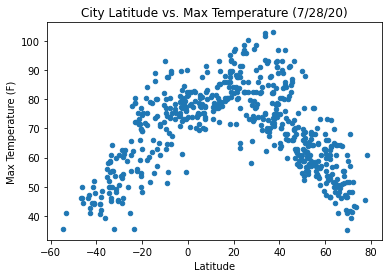

In [108]:
plot = city_weather_df.plot.scatter(x='Latitude', y= 'Temperature')
plt.title('City Latitude vs. Max Temperature (7/28/20)')
plt.ylabel('Max Temperature (F)')
plt.show()
fig = plot.get_figure()
fig.savefig('output_data/LatitudeVTemperature.png')

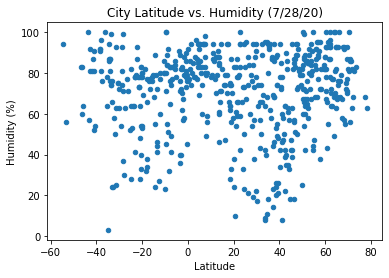

In [109]:
plot = city_weather_df.plot.scatter(x='Latitude', y= 'Humidity')
plt.title('City Latitude vs. Humidity (7/28/20)')
plt.ylabel('Humidity (%)')
plt.show()
fig = plot.get_figure()
fig.savefig('output_data/LatitudeVHumidity.png')

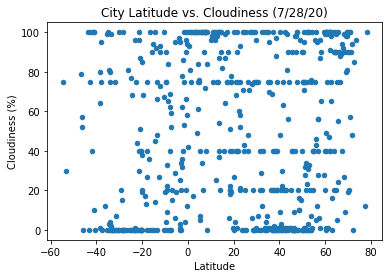

In [110]:
plot = city_weather_df.plot.scatter(x='Latitude', y= 'Cloudiness')
plt.title('City Latitude vs. Cloudiness (7/28/20)')
plt.ylabel('Cloudiness (%)')
plt.show()
fig = plot.get_figure()
fig.savefig('output_data/LatitudeVCloudiness.png')

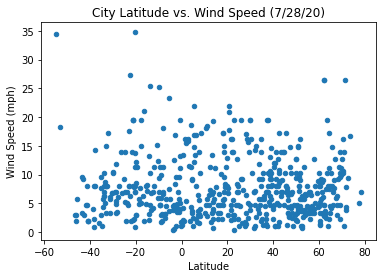

In [111]:
plot = city_weather_df.plot.scatter(x='Latitude', y= 'Wind Speed')
plt.title('City Latitude vs. Wind Speed (7/28/20)')
plt.ylabel('Wind Speed (mph)')
plt.show()
fig = plot.get_figure()
fig.savefig('output_data/LatitudeVWindSpeed.png')

In [116]:
north_hem_df = city_weather_df.loc[city_weather_df['Latitude'] > 0, :]
north_hem_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City country,City datetime
0,severo-kurilsk,50.68,156.12,52.21,87,95,14.83,RU,1595970734
1,warrington,53.39,-2.58,60.80,72,20,11.41,GB,1595970469
2,lata,40.16,-8.33,64.99,94,0,2.30,PT,1595970734
6,havre-saint-pierre,50.23,-63.60,66.20,72,75,10.29,CA,1595970463
9,bethel,41.37,-73.41,89.01,58,75,8.05,US,1595970735
...,...,...,...,...,...,...,...,...,...
559,feicheng,35.26,117.97,68.65,92,95,2.21,CN,1595970815
560,kirillov,59.86,38.38,68.00,82,40,4.47,RU,1595970815
561,mitu,1.20,-70.17,78.55,94,100,1.95,CO,1595970815
562,ukiah,39.15,-123.21,97.00,21,1,5.82,US,1595970815


In [117]:
south_hem_df = city_weather_df.loc[city_weather_df['Latitude'] < 0, :]
south_hem_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City country,City datetime
3,sao gabriel da cachoeira,-0.13,-67.09,81.59,92,100,1.14,BR,1595970734
4,srandakan,-7.94,110.25,73.87,83,69,6.69,ID,1595970734
5,kampene,-3.60,26.67,70.86,36,0,0.40,CD,1595970735
7,atuona,-9.80,-139.03,80.01,71,4,25.21,PF,1595970735
8,punta arenas,-53.15,-70.92,41.00,56,30,18.34,CL,1595970662
...,...,...,...,...,...,...,...,...,...
549,santiago del estero,-27.80,-64.26,61.34,30,0,6.11,AR,1595970796
553,altamira,-3.20,-52.21,89.60,40,20,4.70,BR,1595970814
554,rawson,-43.30,-65.10,47.23,57,0,9.51,AR,1595970584
555,waipawa,-41.41,175.52,50.00,87,100,4.70,NZ,1595970814


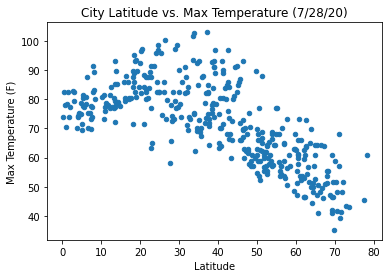

In [118]:
plot = north_hem_df.plot.scatter(x='Latitude', y= 'Temperature')
plt.title('North Hemisphere - Max Temperature vs. City Latitude (7/28/20)')
plt.ylabel('Max Temperature (F)')
plt.show()
fig = plot.get_figure()
fig.savefig('output_data/LatitudeVTemperatureForNorthHem.png')

In [ ]:
plot = south_hem_df.plot.scatter(x='Latitude', y= 'Temperature')
plt.title('City Latitude vs. Max Temperature (7/28/20)')
plt.ylabel('Max Temperature (F)')
plt.show()
fig = plot.get_figure()
fig.savefig('output_data/LatitudeVTemperatureForSouthHem.png')